<a href="https://colab.research.google.com/github/Priyasri0210/DS-problems/blob/main/Homework_problems/Machine_learning/car_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
car_df = pd.read_csv('/content/car data.csv')
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_df.shape


(301, 9)

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
print(car_df.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [ ]:
replacement_dict = {
    'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2},
    'Seller_Type': {'Dealer': 0, 'Individual': 1},
    'Transmission': {'Manual': 0, 'Automatic': 1}
}
car_df.replace(replacement_dict, inplace=True)

<ipython-input-6-ae2087eae4d1>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace(replacement_dict, inplace=True)


In [ ]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(car_df['Car_Name'])
Car_Name_vector = vectorizer.transform(car_df['Car_Name'])
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [ ]:
print(Car_Name_vector)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 556 stored elements and shape (301, 120)>
  Coords	Values
  (0, 92)	1.0
  (1, 104)	1.0
  (2, 33)	1.0
  (3, 113)	1.0
  (4, 103)	1.0
  (5, 26)	0.7071067811865475
  (5, 112)	0.7071067811865475
  (6, 33)	1.0
  (7, 38)	1.0
  (8, 33)	1.0
  (9, 33)	1.0
  (10, 16)	0.7623095933499867
  (10, 20)	0.6472125492344674
  (11, 33)	1.0
  (12, 33)	1.0
  (13, 51)	1.0
  (14, 47)	1.0
  (15, 51)	1.0
  (16, 51)	1.0
  (17, 51)	1.0
  (18, 113)	1.0
  (19, 104)	1.0
  (20, 20)	0.6957618941754419
  (20, 74)	0.7182725016408474
  (21, 68)	1.0
  :	:
  (276, 34)	1.0
  (277, 34)	1.0
  (278, 72)	1.0
  (279, 34)	1.0
  (280, 27)	1.0
  (281, 34)	1.0
  (282, 34)	1.0
  (283, 34)	1.0
  (284, 27)	1.0
  (285, 72)	1.0
  (286, 72)	1.0
  (287, 21)	1.0
  (288, 34)	1.0
  (289, 34)	1.0
  (290, 21)	1.0
  (291, 27)	1.0
  (292, 72)	1.0
  (293, 34)	1.0
  (294, 21)	1.0
  (295, 34)	1.0
  (296, 34)	1.0
  (297, 27)	1.0
  (298, 34)	1.0
  (299, 34)	1.0
  (300, 27)	1.0


In [ ]:
X = car_df.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_df['Selling_Price']

In [ ]:
vectorizer = pd.DataFrame(Car_Name_vector.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
vectorizer

,100,125,135,150,16,160,160r,180,200,220,...,unicorn,verna,vitara,wagon,wego,xcent,xt300,xtreme,yamaha,yuga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = pd.concat([vectorizer,X], axis=1)

In [ ]:
X.head(10)

,100,125,135,150,16,160,160r,180,200,220,...,xtreme,yamaha,yuga,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2014,5.59,27000,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2013,9.54,43000,1,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2017,9.85,6900,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2011,4.15,5200,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2014,6.87,42450,1,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2018,9.83,2071,1,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2015,8.12,18796,0,0,0,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2015,8.61,33429,1,0,0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2016,8.89,20273,1,0,0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2015,8.92,42367,1,0,0,0


In [ ]:
Y.head()


,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [ ]:
scaler = StandardScaler()
X.columns = X.columns.astype(str)
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,100,125,135,150,16,160,160r,180,200,220,...,xtreme,yamaha,yuga,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,-0.081758,-0.115618,-0.057735,-0.164569,-0.057735,-0.100335,-0.100335,-0.081786,-0.116052,-0.164105,...,-0.057735,-0.164413,-0.057735,0.128897,-0.236215,-0.256224,-0.500183,-0.737285,-0.39148,-0.174501
1,-0.081758,-0.115618,-0.057735,-0.164569,-0.057735,-0.100335,-0.100335,-0.081786,-0.116052,-0.164105,...,-0.057735,-0.164413,-0.057735,-0.217514,0.221505,0.155911,1.852241,-0.737285,-0.39148,-0.174501
2,-0.081758,-0.115618,-0.057735,-0.164569,-0.057735,-0.100335,-0.100335,-0.081786,-0.116052,-0.164105,...,-0.057735,-0.164413,-0.057735,1.168129,0.257427,-0.773969,-0.500183,-0.737285,-0.39148,-0.174501
3,-0.081758,-0.115618,-0.057735,-0.164569,-0.057735,-0.100335,-0.100335,-0.081786,-0.116052,-0.164105,...,-0.057735,-0.164413,-0.057735,-0.910335,-0.403079,-0.817758,-0.500183,-0.737285,-0.39148,-0.174501
4,-0.081758,-0.115618,-0.057735,-0.164569,-0.057735,-0.100335,-0.100335,-0.081786,-0.116052,-0.164105,...,-0.057735,-0.164413,-0.057735,0.128897,-0.087890,0.141743,1.852241,-0.737285,-0.39148,-0.174501


In [ ]:
X_scaled_train,X_scaled_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.3,random_state=2)

In [ ]:
X_scaled_train.shape, X_scaled_test.shape

((210, 127), (91, 127))

In [ ]:
Y_train.shape, Y_test.shape

((210,), (91,))

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(X_scaled_train,Y_train)

LinearRegression()

In [ ]:
training_prediction = linear_model.predict(X_scaled_train)

In [ ]:
training_prediction[:20]

array([ 8.30904686,  5.40496442,  2.56658219, 24.60720599,  1.50805334,
        5.90716006,  2.16449252,  5.78225671,  2.5       , 10.17308232,
        2.10660296,  2.1956312 ,  0.3       ,  1.45      , 12.43134442,
        2.71449779,  0.2       ,  4.21866357, 11.81072765, -1.09027377])

In [ ]:
error_score = metrics.r2_score(Y_train,training_prediction)
print('Training_Accuracy : ',error_score)

Training_Accuracy :  0.9405782262636113


In [43]:
train_data_accuracy = mean_squared_error(Y_train, training_prediction)
print('Train_Accuracy_score : ',train_data_accuracy)

Train_Accuracy_score :  1.7994673858286605


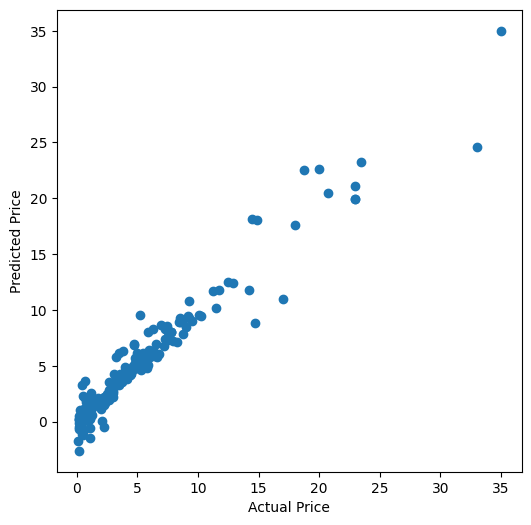

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(x=Y_train,y=training_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
test_prediction = linear_model.predict(X_scaled_test)

In [ ]:
test_prediction[:10]


array([  10.7791444 ,    2.16442039,    3.58242428,    3.66478261,
         11.20226972,    3.61919334,    5.42182474, 1825.92624906,
        687.32042802,    4.83564354])

In [ ]:
error_score = metrics.r2_score(Y_test, test_prediction)
print('Test_Accuracy_r2 : ',error_score)


Test_Accuracy_r2 :  -57396.710859598024


In [ ]:
test_data_accuracy = mean_squared_error(Y_test, test_prediction)
print('Test_Accuracy_score : ',test_data_accuracy)

Test_Accuracy_score :  828131.502363403


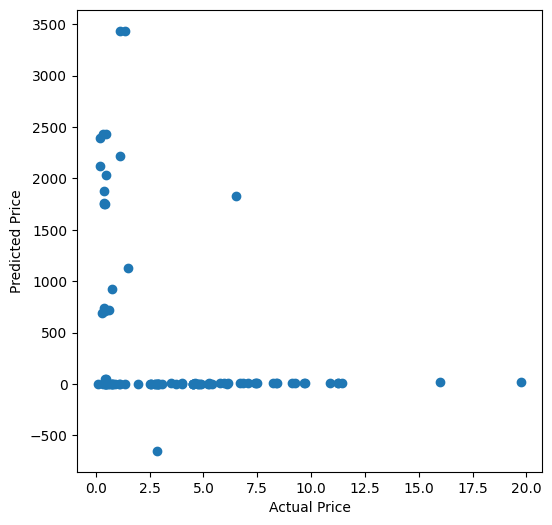

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(x=Y_test,y=test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
vectorizer = joblib.load('vectorizer.pkl')
scaler = joblib.load('scaler.pkl')


Car_Name = ['ciaz']
Car_Name_df = pd.DataFrame({'Car_Name': Car_Name})
other_features = pd.DataFrame({
    'Year': [2018],
    'Present_Price': [9.94],
    'Kms_Driven': [25000],
    'Fuel_Type': [1],
    'Seller_Type': [0],
    'Transmission': [1],
    'Owner': [0]
})

Car_Name_vector = vectorizer.transform(Car_Name_df['Car_Name'])
Car_Name_features = pd.DataFrame(Car_Name_vector.toarray(), columns=[str(col) for col in vectorizer.get_feature_names_out()])

input = pd.concat([Car_Name_features, other_features], axis=1)
#input = input.reindex(columns=scaler.feature_names_in_, fill_value=0)
input_scaled = scaler.transform(input)
input_scaled = pd.DataFrame(input_scaled, columns=input.columns)



In [ ]:
prediction = linear_model.predict(input_scaled)
print(prediction)

[9.76193192]
